**Importing Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Reading and Loading the Dataset**

In [6]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\accident_prediction_india.csv")
df.head()

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Road Type,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details
0,Jammu and Kashmir,Unknown,2021,May,Monday,1:46,Serious,5,Cycle,0,...,National Highway,Wet,Dark,Signs,61,66,Male,NaN,Yes,Curve
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,5,...,Urban Road,Dry,Dusk,Signs,92,60,Male,NaN,Yes,Straight Road
2,Chhattisgarh,Unknown,2023,May,Wednesday,5:37,Minor,5,Pedestrian,6,...,National Highway,Under Construction,Dawn,Signs,120,26,Female,NaN,No,Bridge
3,Uttar Pradesh,Lucknow,2020,June,Saturday,0:31,Minor,3,Bus,10,...,State Highway,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road
4,Sikkim,Unknown,2021,August,Thursday,11:21,Minor,5,Cycle,7,...,Urban Road,Wet,Dusk,Signs,115,30,Male,NaN,No,Intersection


**Handling Missing Values**

In [7]:
df.replace('Unknown', pd.NA, inplace = True)
df['Hour'] = pd.to_datetime(df['Time of Day'], format = '%H:%M', errors = 'coerce').dt.hour

In [8]:
df

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details,Hour
0,Jammu and Kashmir,<NA>,2021,May,Monday,1:46,Serious,5,Cycle,0,...,Wet,Dark,Signs,61,66,Male,NaN,Yes,Curve,1
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,5,...,Dry,Dusk,Signs,92,60,Male,NaN,Yes,Straight Road,21
2,Chhattisgarh,<NA>,2023,May,Wednesday,5:37,Minor,5,Pedestrian,6,...,Under Construction,Dawn,Signs,120,26,Female,NaN,No,Bridge,5
3,Uttar Pradesh,Lucknow,2020,June,Saturday,0:31,Minor,3,Bus,10,...,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road,0
4,Sikkim,<NA>,2021,August,Thursday,11:21,Minor,5,Cycle,7,...,Wet,Dusk,Signs,115,30,Male,NaN,No,Intersection,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Tamil Nadu,Chennai,2021,January,Sunday,1:15,Minor,5,Truck,4,...,Wet,Dark,Signs,74,43,Male,Expired,Yes,Intersection,1
2996,Uttarakhand,<NA>,2018,July,Sunday,10:12,Fatal,3,Car,3,...,Under Construction,Daylight,NaN,86,23,Female,NaN,Yes,Intersection,10
2997,Meghalaya,<NA>,2021,January,Thursday,19:34,Minor,2,Two-Wheeler,8,...,Dry,Dark,Signs,47,57,Female,Valid,Yes,Intersection,19
2998,Meghalaya,<NA>,2023,June,Sunday,20:54,Fatal,1,Cycle,9,...,Under Construction,Daylight,Signs,60,28,Female,Expired,Yes,Bridge,20


**Analysing Pattern**

**A. TIME OF DAY ANALYSIS**

<Axes: title={'center': 'Accident By Hour'}, xlabel='Hour'>

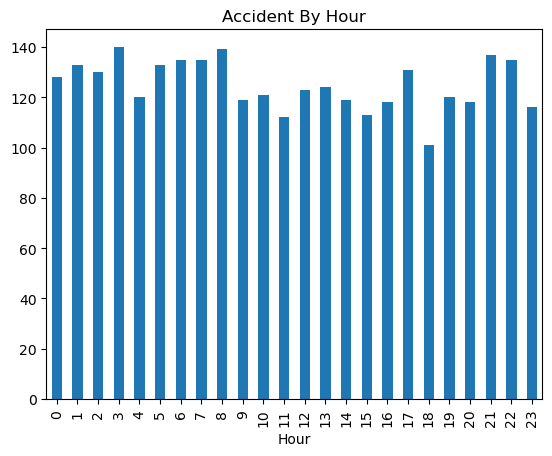

In [9]:
df['Hour'].value_counts().sort_index().plot(kind = 'bar', title = 'Accident By Hour')

**B. Weather Conditions**

<Axes: title={'center': 'Accidents by Weather'}, xlabel='Weather Conditions'>

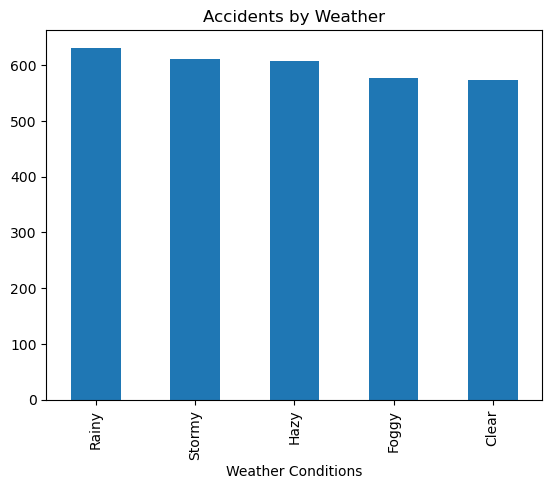

In [11]:
df['Weather Conditions'].value_counts().plot(kind = 'bar', title = 'Accidents by Weather')

**C. Road Conditions**

<Axes: title={'center': 'Accidents by Road Condition'}, xlabel='Road Condition'>

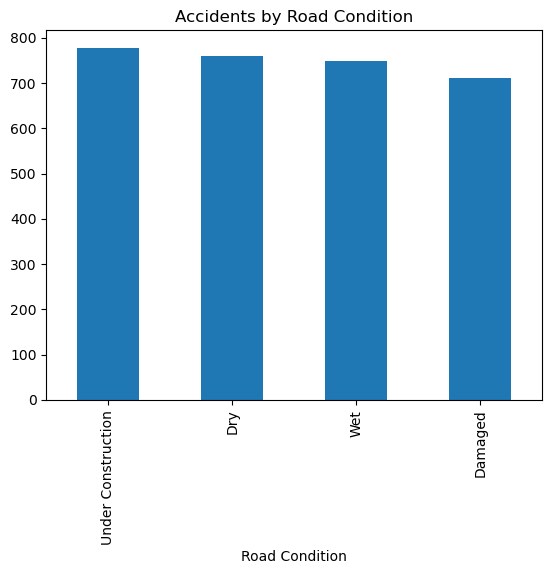

In [12]:
df['Road Condition'].value_counts().plot(kind='bar', title='Accidents by Road Condition')

**Visualizing Contributing Factors**

**A. Severity Vs Weather & Road**

Text(0.5, 1.0, 'Severity by Weather')

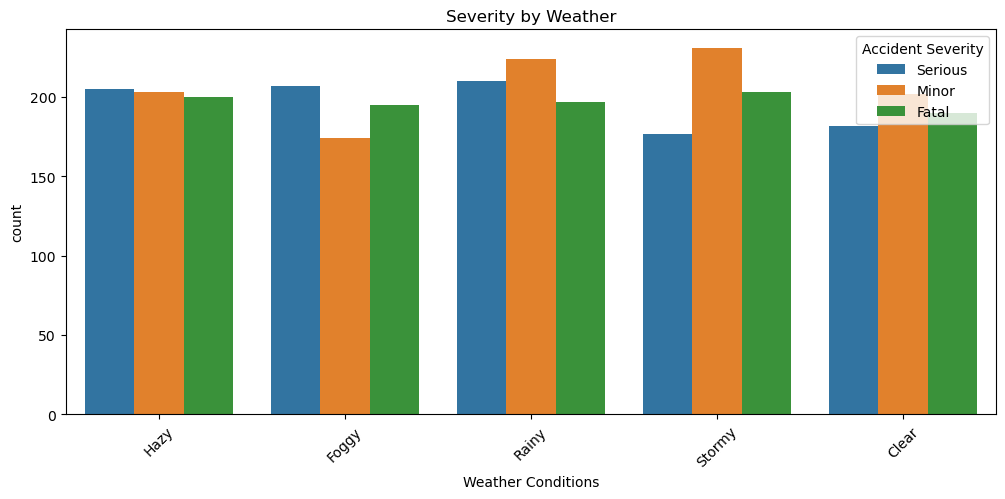

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Weather Conditions', hue='Accident Severity')
plt.xticks(rotation=45)
plt.title('Severity by Weather')


**B. Alcohol Involvement**

<Axes: title={'center': 'Alcohol Involvement in Accidents'}, ylabel='count'>

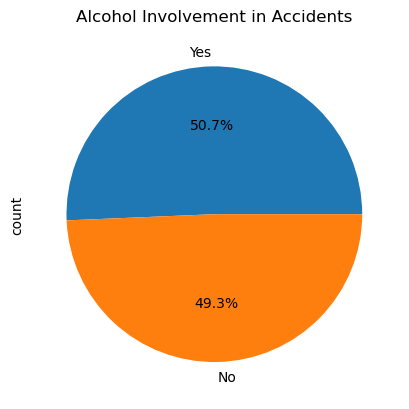

In [14]:
df['Alcohol Involvement'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Alcohol Involvement in Accidents')

**Accident Prone Cities**

<Axes: title={'center': 'Top 10 Accident-Prone Cities'}, xlabel='City Name'>

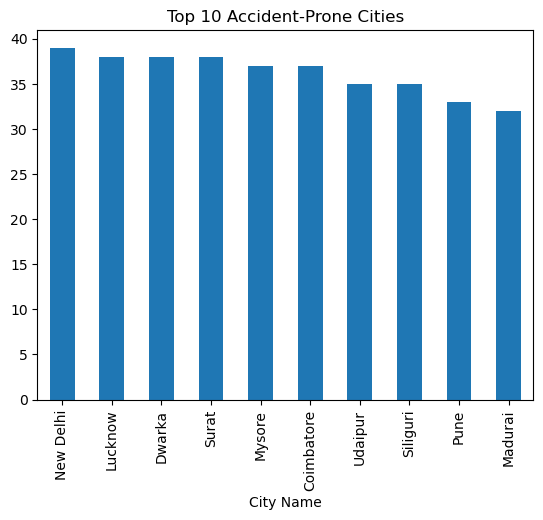

In [15]:
top_cities = df['City Name'].value_counts().head(10)
top_cities.plot(kind='bar', title='Top 10 Accident-Prone Cities')